## Question 1

We import the data using pandas read_csv function. We then loop through the columns to determine if there are any missing values and print that column. 

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
%matplotlib inline

filePath = r"./train_wbcd.csv"
df = pd.read_csv(filePath)

columnWithMissingData = ""

for col in df.columns:
    numMissingValues = df[col].isna().sum()
    if numMissingValues != 0:
        columnWithMissingData = col
        print(f"Feature {col} has {numMissingValues} missing values.")
    
print("All other features do not have missing values")


Feature f21 has 2 missing values.
All other features do not have missing values


## Question 2

Fill the missing entries. To determine the most suitable method (mean or median) we will  determine whether the data is normally distributed or not. If the data is normally distributed then the mean will be used. If it is skewed then we will use the median. 

To determine the normailty of the data we can plot it and conduct a Shapiro-Wilk test

We have a Shapiro-Wilks p value of 0.0038. When compared to the standard alpha value of 0.05 we can see that the data is not normally distributed


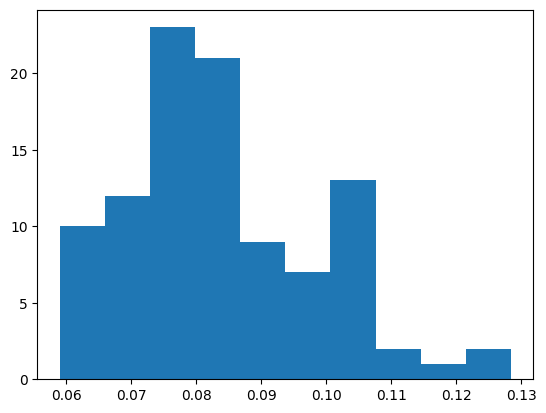

In [144]:
plt.hist(df[col])

stat, p = shapiro(df[col])
alpha = 0.05
print(f"We have a Shapiro-Wilks p value of {round(p, 4)}. When compared to the standard alpha value of {alpha} we can see that ", end ="")
print("the data is normally distributed" if p>alpha else "the data is not normally distributed")

From the p value of 0.0038 and the plot showing a left skewed data, we can infer that we should use the median to fill the missing values. 

In [145]:
colMedian = df[columnWithMissingData].median()

df[columnWithMissingData] = df[columnWithMissingData].fillna(colMedian)

print(f"Number of missing values is now: {df[columnWithMissingData].isna().sum()}. The missing values were replaced with the median of that feature: {colMedian}")

Number of missing values is now: 0. The missing values were replaced with the median of that feature: 15.315


## Question 3

In order to determine an appropriate encoding method we need to find the number of distinct values in the diagnosis column and determine the best method. I will do that using pd.unique()

In [146]:
numUniqueValues = df["Diagnosis"].unique()

print(f"The unique values in the Diagnosis target are {numUniqueValues}")

encoderCategories = ["B" "M"]


The unique values in the Diagnosis target are ['B' 'M']


We can see from this that there are two unique values, B (Benign) and M (Malignant). As there are two values one representing benign and one malignant we can use One Hot encoding. 

We can use one hot encoding in this case due to the number of unique values. One hot encoding takes categorical data and assigns a numeric value.

In [147]:
encoder =  OneHotEncoder(categories="auto", drop="first")  

diagnosisFeature = df["Diagnosis"].values #numpy array 

#encode the data using onehotencoder to match B and M to binary 0 and 1 respectively. 
encodedDiagnosis = encoder.fit_transform(df[["Diagnosis"]]).toarray()

#insert the encoded vector back into the dataframe. 
df["Diagnosis"] = encodedDiagnosis[:,0]

#Export the data as a new CSV

df.to_csv("Encoded_wbcd.csv")


## Question 4



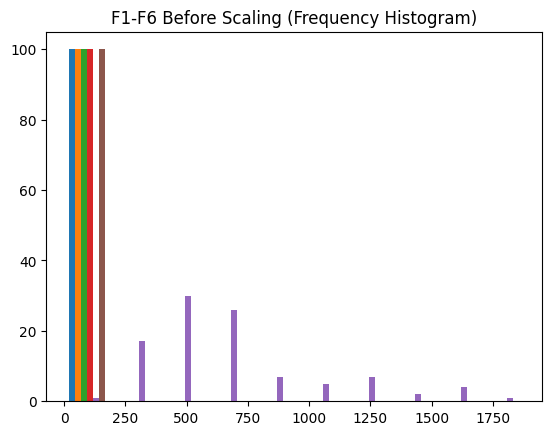

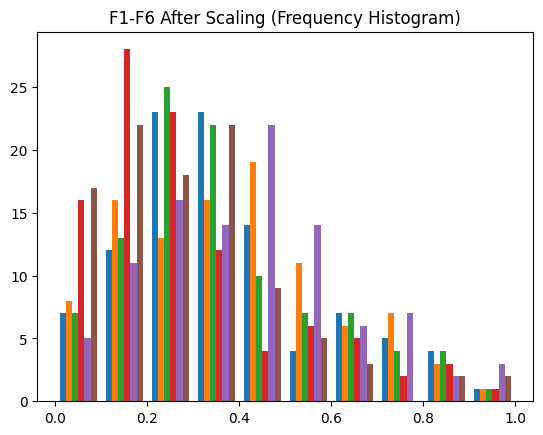

In [167]:

scaler = MinMaxScaler()

scaledDF = pd.DataFrame(scaler.fit_transform(df.iloc[:,2:]), columns= df.iloc[:,2:].columns)


plt.hist(df.iloc[:,1:7])
plt.title("F1-F6 Before Scaling (Frequency Histogram)")
plt.show()

plt.hist(scaledDF.iloc[:,:6])
plt.title("F1-F6 After Scaling (Frequency Histogram)")
plt.show()


In the above two plots (before and after) we can see a stark distance in the distribution of values before and after scaling. The range in the before plot shows from 0-1750 where as the range in the after plot shows 0-1. This is due to the scaling that has been applied to the data, bringing it into a comparable range to the rest of the data.  
Additionally we can see in the before plot that all the data except for the purple series is bounded between 0 and 1 where as the purple series is between 0 and 1750. This heavily skews the data and would drastically affect the model when training, providing a bias to that feature.  
It is important to scale the data if this sort of distribution occurs to allow each feature to impact the model at a relative scale. 